#### Name - Sahib Hussain
#### Internship 17

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("file://DESKTOP-9T24OLP/Users/OWNER/Documents/FRP/ML%20%20Projects/Micro%20Credit%20Project/Data%20file.csv")

In [4]:
df.head(5)

Unnamed: 0  label       msisdn    aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789  272.0   3055.050000   3065.150000   
1           2      1  76462I70374  712.0  12122.000000  12124.750000   
2           3      1  17943I70372  535.0   1398.000000   1398.000000   
3           4      1  55773I70781  241.0     21.228000     21.228000   
4           5      1  03813I82730  947.0    150.619333    150.619333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  

[5 rows x 37 columns]

In [3]:
#Dropping unnamed :0 and msisdn columns from the dataset as this is not helpful in predicting.
df.drop(['Unnamed: 0', 'msisdn'], axis = 1, inplace =True)

In [12]:
# From the dataset we saw the the pcircle column is categorical, let's check the values in it.
df['pcircle'].value_counts()

UPW    209593
Name: pcircle, dtype: int64

We only found 1 value which is UPW circle and since all are from the same circle we will drop this column

In [4]:
#Dropping pcircle column from the dataset.
df.drop('pcircle', axis =1, inplace =True)

In [9]:
#Let us now see all the columns in the dataset, their datatype and whether there is any null values in any of them or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

In the above details we can see there are 21 columns which has float64 datatype, 12 of them has int64 and only one column which is date has object datatype.

None of them has any null value.

there are total 34 columns in the dataset, 33 features(independent variables) and 1 label (dependent variable) which we will predict.

In [11]:
#Checking again if there is any null values in the dataset or not.
df.isnull().sum()

label                   0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

Above we clearly saw there is no null values in the entire dataset.

In [12]:
df.describe()

label            aon   daily_decr30   daily_decr90  \
count  209593.000000  209593.000000  209593.000000  209593.000000   
mean        0.875177    8112.343445    5381.402289    6082.515068   
std         0.330519   75696.082531    9220.623400   10918.812767   
min         0.000000     -48.000000     -93.012667     -93.012667   
25%         1.000000     246.000000      42.440000      42.692000   
50%         1.000000     527.000000    1469.175667    1500.000000   
75%         1.000000     982.000000    7244.000000    7802.790000   
max         1.000000  999860.755168  265926.000000  320630.000000   

            rental30       rental90  last_rech_date_ma  last_rech_date_da  \
count  209593.000000  209593.000000      209593.000000      209593.000000   
mean     2692.581910    3483.406534        3755.847800        3712.202921   
std      4308.586781    5770.461279       53905.892230       53374.833430   
min    -23737.140000  -24720.580000         -29.000000         -29.000000   
25%       280.420000     300.260000           1.000000           0.000000   
50%      1083.570000    1334.000000           3.000000           0.000000   
75%      3356.940000    4201.790000           7.000000           0.000000   
max    198926.110000  200148.110000      998650.377733      999171.809410   

       last_rech_amt_ma  cnt_ma_rech30  ...    cnt_loans30   amnt_loans30  \
count     209593.000000  209593.000000  ...  209593.000000  209593.000000   
mean        2064.452797       3.978057  ...       2.758981      17.952021   
std         2370.786034       4.256090  ...       2.554502      17.379741   
min            0.000000       0.000000  ...       0.000000       0.000000   
25%          770.000000       1.000000  ...       1.000000       6.000000   
50%         1539.000000       3.000000  ...       2.000000      12.000000   
75%         2309.000000       5.000000  ...       4.000000      24.000000   
max        55000.000000     203.000000  ...      50.000000     306.000000   

       maxamnt_loans30  medianamnt_loans30    cnt_loans90   amnt_loans90  \
count    209593.000000       209593.000000  209593.000000  209593.000000   
mean        274.658747            0.054029      18.520919      23.645398   
std        4245.264648            0.218039     224.797423      26.469861   
min           0.000000            0.000000       0.000000       0.000000   
25%           6.000000            0.000000       1.000000       6.000000   
50%           6.000000            0.000000       2.000000      12.000000   
75%           6.000000            0.000000       5.000000      30.000000   
max       99864.560864            3.000000    4997.517944     438.000000   

       maxamnt_loans90  medianamnt_loans90      payback30      payback90  
count    209593.000000       209593.000000  209593.000000  209593.000000  
mean          6.703134            0.046077       3.398826       4.321485  
std           2.103864            0.200692       8.813729      10.308108  
min           0.000000            0.000000       0.000000       0.000000  
25%           6.000000            0.000000       0.000000       0.000000  
50%           6.000000            0.000000       0.000000       1.666667  
75%           6.000000            0.000000       3.750000       4.500000  
max          12.000000            3.000000     171.500000     171.500000  

[8 rows x 33 columns]

We see the mean of each feature and also we can see that in most of the features there is lot of difference between the 75th quartile and the max, one of the reason is presence of outliers in the dataset.

In [7]:
df.shape

(209593, 34)

Number of rows in the dataset are 209593 and columns are 34

In [5]:
#Lets drop all the duplicate entries from the dataset.

df.drop_duplicates(inplace=True)

In [15]:
df.shape

(209562, 34)

After removing the duplicate entries we are now left with 209562 rows and 34 columns.

<AxesSubplot:xlabel='label', ylabel='count'>

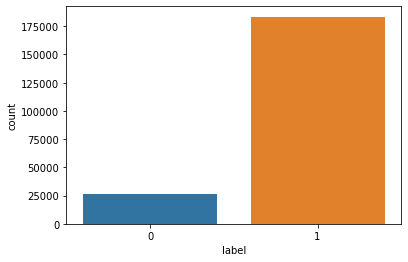

In [27]:
#Lets plot a countplot to see the values of our label
sns.countplot(x='label', data=df)

There is lot of imbalance in the label column between 1 who are non-defaulters and 0 who are defaulters in paying back within 5 days of issuing loan

In [28]:
print("NON - DEFAULTERS ==>",df.value_counts('label')[1])
print("DEFAULTERS ==>",df.value_counts('label')[0])

NON - DEFAULTERS ==> 183429
DEFAULTERS ==> 26133


Above we can see the numbers of each of them.

**EDA**

In [22]:
from mpl_toolkits.mplot3d import Axes3D

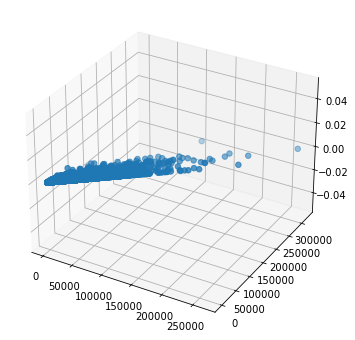

In [24]:
fig = plt.figure(figsize= [10,6])
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['daily_decr30'],df['daily_decr90'], s=30)
plt.show()

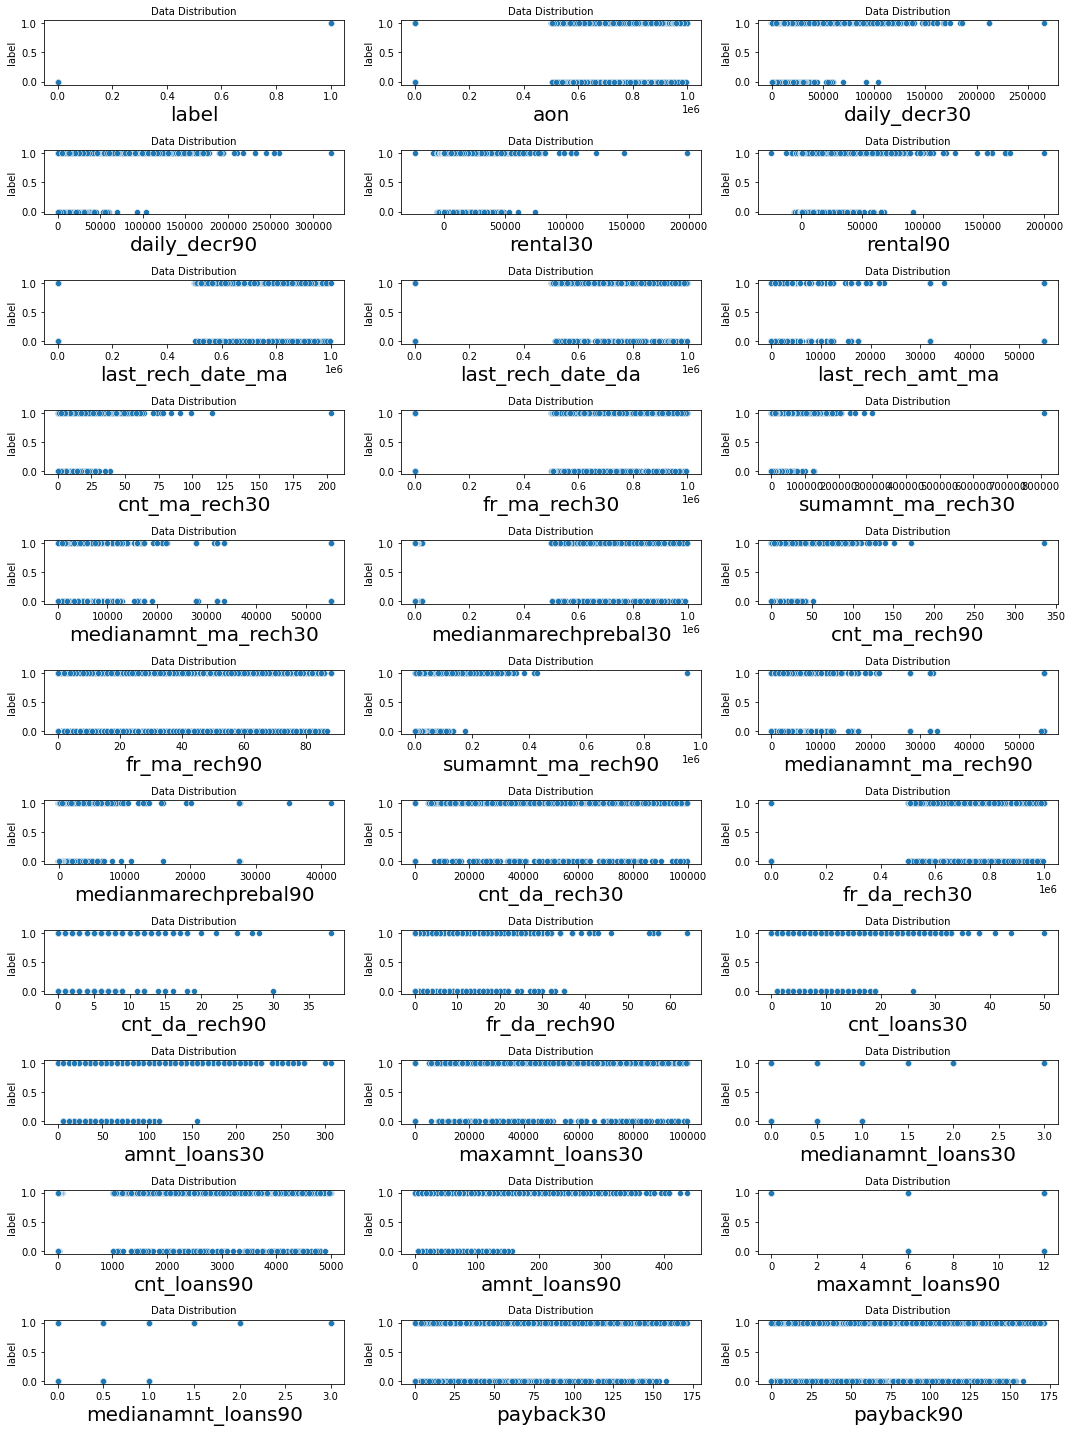

In [6]:
#Lets now plot scatter plot for each column in x with respect to y to understand the data.

plt.figure(figsize = [15,20])
plotnumber = 1

for column in df:
    if plotnumber<=33:
        ax = plt.subplot(11,3,plotnumber)
        sns.scatterplot(x = df[column], y= df['label'])
        plt.xlabel(column, fontsize = 20)
        plt.title("Data Distribution", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

In [41]:
#Lets now plot scatter plot for each column in x with respect to y to understand the data.

plt.figure(figsize = [15,20])
plotnumber = 1

for column in df:
    if plotnumber<=33:
        ax = plt.subplot(11,3,plotnumber)
        sns.boxplot(x = df[column])
        plt.xlabel(column, fontsize = 13)
        plt.title("Quartiles and outliers", fontsize = 15)
    plotnumber += 1
plt.tight_layout()

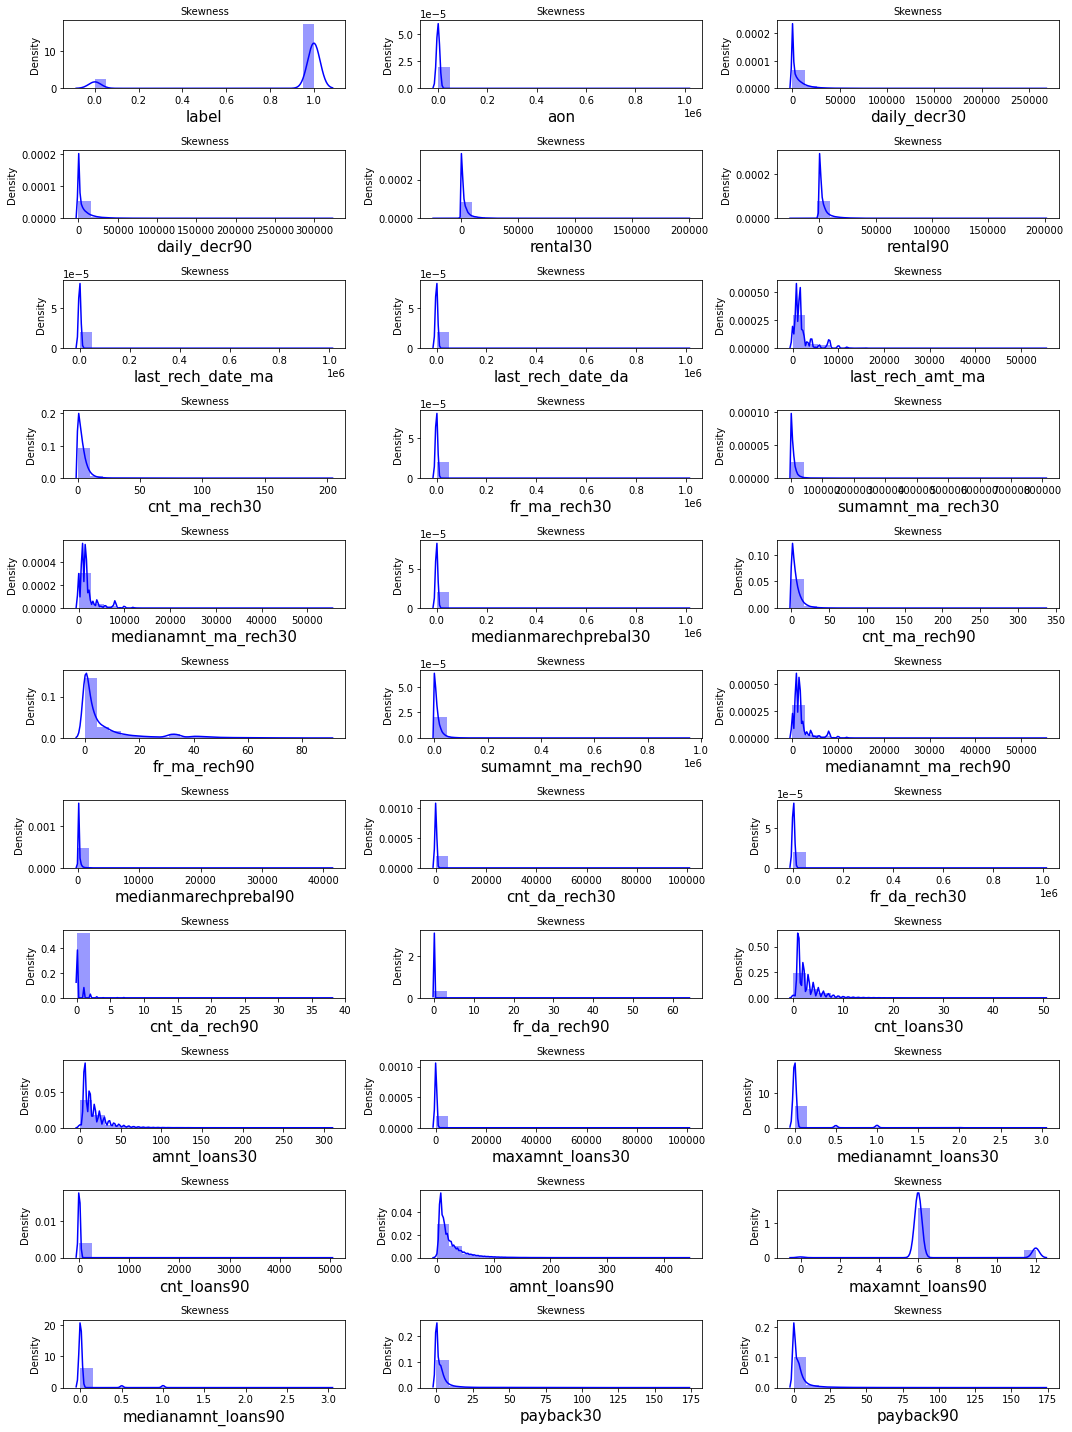

In [45]:
plt.figure(figsize = [15,20])
plotnumber = 1

for column in df:
    if plotnumber<=33:
        ax = plt.subplot(11,3,plotnumber)
        sns.distplot(x = df[column], hist=True, color='blue', bins=20)
        plt.xlabel(column, fontsize = 15)
        plt.title("Skewness", fontsize = 10)
    plotnumber += 1
plt.tight_layout()

In [46]:
df.skew()

label                   -2.271915
aon                     10.392159
daily_decr30             3.945997
daily_decr90             4.252312
rental30                 4.521743
rental90                 4.437471
last_rech_date_ma       14.789865
last_rech_date_da       14.813747
last_rech_amt_ma         3.781206
cnt_ma_rech30            3.283935
fr_ma_rech30            14.771725
sumamnt_ma_rech30        6.386845
medianamnt_ma_rech30     3.512361
medianmarechprebal30    14.778767
cnt_ma_rech90            3.425285
fr_ma_rech90             2.285206
sumamnt_ma_rech90        4.897896
medianamnt_ma_rech90     3.752792
medianmarechprebal90    44.877678
cnt_da_rech30           17.817034
fr_da_rech30            14.775322
cnt_da_rech90           27.265281
fr_da_rech90            28.985932
cnt_loans30              2.713259
amnt_loans30             2.975560
maxamnt_loans30         17.656733
medianamnt_loans30       4.550661
cnt_loans90             16.593169
amnt_loans90             3.149830
maxamnt_loans9

In [48]:
#Now will check the collinearity among features
corr_mat = df.corr()
corr_mat

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003825      0.168174      0.166034   
aon                  -0.003825  1.000000      0.001096      0.000366   
daily_decr30          0.168174  0.001096      1.000000      0.977703   
daily_decr90          0.166034  0.000366      0.977703      1.000000   
rental30              0.057886 -0.000969      0.442038      0.434658   
rental90              0.075339 -0.000799      0.458950      0.471705   
last_rech_date_ma     0.003705  0.001691      0.000481      0.000903   
last_rech_date_da     0.001687 -0.001694     -0.001641     -0.001892   
last_rech_amt_ma      0.131558  0.004243      0.275787      0.264082   
cnt_ma_rech30         0.237120 -0.003162      0.451347      0.426670   
fr_ma_rech30          0.001306 -0.001164     -0.000582     -0.000348   
sumamnt_ma_rech30     0.202658  0.000696      0.636515      0.603864   
medianamnt_ma_rech30  0.141248  0.004293      0.295307      0.282912   
medianmarechprebal30 -0.004857  0.003929     -0.001159     -0.000752   
cnt_ma_rech90         0.236200 -0.002738      0.587312      0.593046   
fr_ma_rech90          0.084205  0.004391     -0.078354     -0.079582   
sumamnt_ma_rech90     0.205634  0.001000      0.762969      0.768805   
medianamnt_ma_rech90  0.120594  0.004896      0.257794      0.250467   
medianmarechprebal90  0.039228 -0.000862      0.037476      0.036364   
cnt_da_rech30         0.003806  0.001563      0.000695      0.000656   
fr_da_rech30         -0.000052  0.000891     -0.001505     -0.001575   
cnt_da_rech90         0.002962  0.001120      0.038806      0.031148   
fr_da_rech90         -0.005438  0.005394      0.020669      0.016433   
cnt_loans30           0.196133 -0.001836      0.366081      0.340352   
amnt_loans30          0.197123 -0.001736      0.471463      0.447840   
maxamnt_loans30       0.000225 -0.002765     -0.000033      0.000020   
medianamnt_loans30    0.044521  0.004660     -0.011631     -0.005611   
cnt_loans90           0.004707 -0.000612      0.008956      0.009440   
amnt_loans90          0.199649 -0.002329      0.563473      0.567182   
maxamnt_loans90       0.084064 -0.001196      0.400184      0.397237   
medianamnt_loans90    0.035681  0.002767     -0.037325     -0.034705   
payback30             0.048213  0.001936      0.026891      0.019377   
payback90             0.049050  0.002199      0.047148      0.040775   

                      rental30  rental90  last_rech_date_ma  \
label                 0.057886  0.075339           0.003705   
aon                  -0.000969 -0.000799           0.001691   
daily_decr30          0.442038  0.458950           0.000481   
daily_decr90          0.434658  0.471705           0.000903   
rental30              1.000000  0.955235          -0.001101   
rental90              0.955235  1.000000          -0.001694   
last_rech_date_ma    -0.001101 -0.001694           1.000000   
last_rech_date_da     0.003255  0.002788           0.001790   
last_rech_amt_ma      0.127204  0.121351          -0.000156   
cnt_ma_rech30         0.233281  0.230199           0.004302   
fr_ma_rech30         -0.001225 -0.000509          -0.001630   
sumamnt_ma_rech30     0.272600  0.259661           0.002098   
medianamnt_ma_rech30  0.129785  0.120176          -0.001367   
medianmarechprebal30 -0.001422 -0.001243           0.004070   
cnt_ma_rech90         0.312066  0.345245           0.004254   
fr_ma_rech90         -0.033586 -0.036579           0.001408   
sumamnt_ma_rech90     0.342263  0.360560           0.002236   
medianamnt_ma_rech90  0.110286  0.103082          -0.000735   
medianmarechprebal90  0.027148  0.029527          -0.001088   
cnt_da_rech30        -0.001110 -0.000553          -0.003468   
fr_da_rech30         -0.002564 -0.002351          -0.003627   
cnt_da_rech90         0.072248  0.056275          -0.003539   
fr_da_rech90          0.046759  0.036883          -0.002396   
cnt_loans30           0.180153  0.171546           0.001186   
a

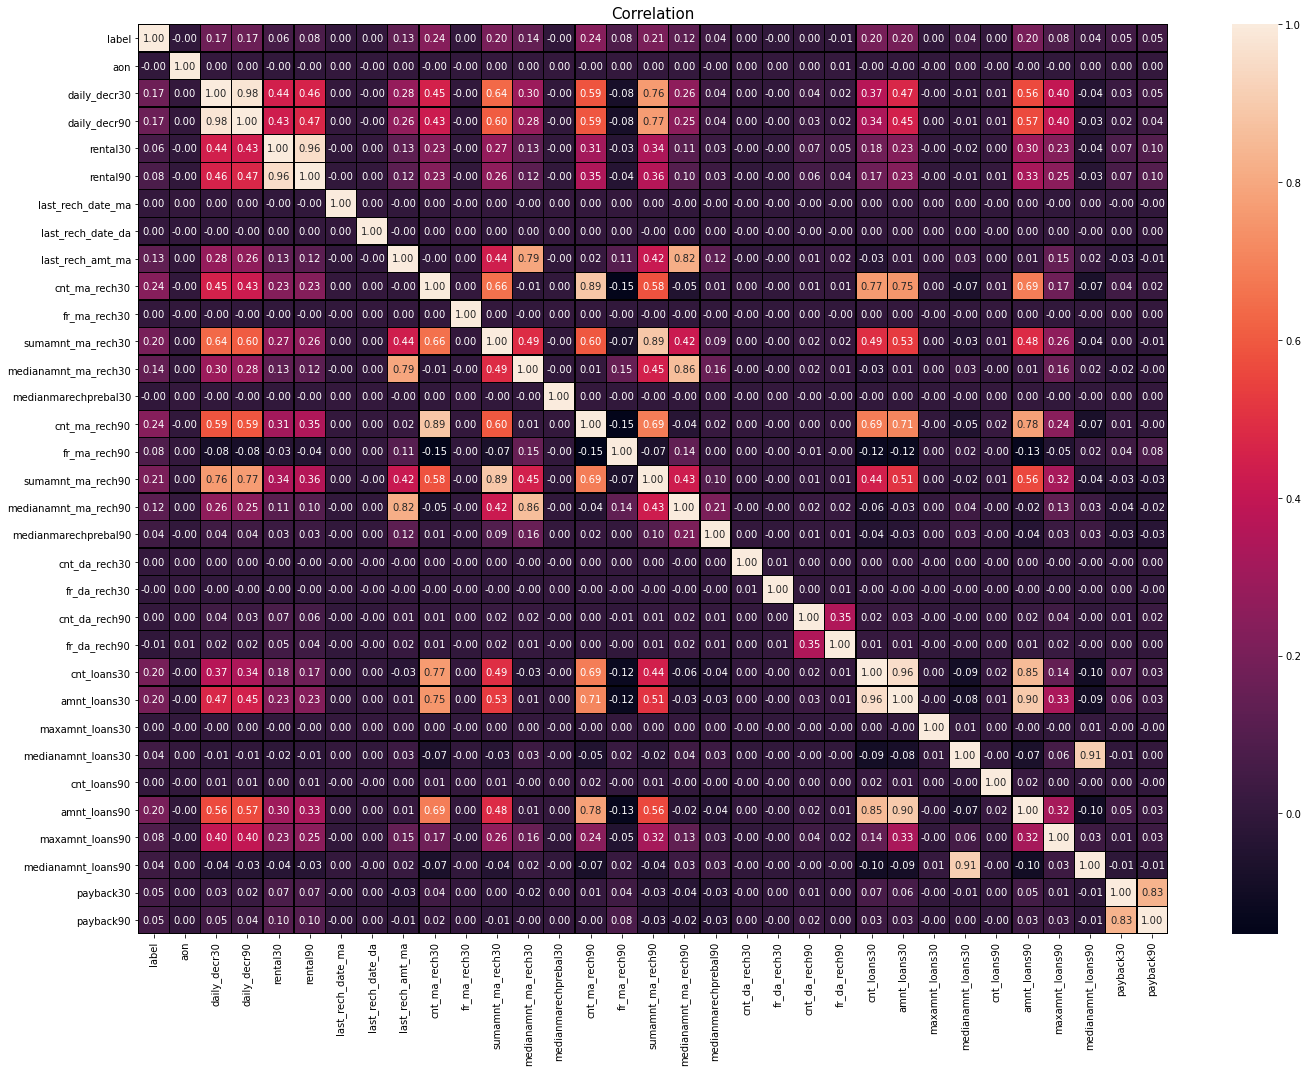

In [56]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_mat,annot=True, linewidths=0.3,linecolor="black",fmt='.2f')
plt.title('Correlation', fontsize=15)
plt.tight_layout()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209562 entries, 0 to 209592
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209562 non-null  int64  
 1   aon                   209562 non-null  float64
 2   daily_decr90          209562 non-null  float64
 3   rental90              209562 non-null  float64
 4   last_rech_date_ma     209562 non-null  float64
 5   last_rech_date_da     209562 non-null  float64
 6   last_rech_amt_ma      209562 non-null  int64  
 7   fr_ma_rech30          209562 non-null  float64
 8   sumamnt_ma_rech30     209562 non-null  float64
 9   medianmarechprebal30  209562 non-null  float64
 10  cnt_ma_rech90         209562 non-null  int64  
 11  fr_ma_rech90          209562 non-null  int64  
 12  sumamnt_ma_rech90     209562 non-null  int64  
 13  medianamnt_ma_rech90  209562 non-null  float64
 14  medianmarechprebal90  209562 non-null  float64
 15  

In [6]:
df.drop(['daily_decr30','rental30','cnt_ma_rech30','medianamnt_ma_rech30','cnt_loans30','payback30','pdate'], axis =1, inplace =True)

In [11]:
df.shape

(209562, 27)

In [7]:
x=df.drop(['label'], axis=1)
y=df['label']

In [8]:
### Now Will remove outliers with the help of Z-score Method.

from scipy import stats

z = np.abs(stats.zscore(x))
print(z)
print('\n Row Numbers ==>', np.where(z>3)[0])
print('\n Column Numbers ==>', np.where(z>3)[1])

[[0.10358473 0.27641156 0.5586432  ... 0.33423905 0.22961154 2.39398367]
 [0.09777242 0.553271   0.03593212 ... 2.5174751  0.22961154 0.41926306]
 [0.10011055 0.42908997 0.44773857 ... 0.33423905 0.22961154 0.41926306]
 ...
 [0.09379627 0.53308666 0.93736841 ... 2.5174751  0.22961154 0.04739711]
 [0.08429843 0.59444741 0.43310435 ... 2.5174751  0.22961154 0.59932627]
 [0.08629311 0.14181847 0.49434104 ... 2.5174751  0.22961154 0.41926306]]

 Row Numbers ==> [    21     22     22 ... 209555 209556 209556]

 Column Numbers ==> [10 10 25 ... 22 20 24]


In [9]:
##Storing the zcore > 3 in index

i = np.where(z>3)[0]

#Deleting the indexes having outliers stored in the above variable

x = x.drop(x.index[i])
y = y.drop(y.index[i])

In [10]:
#Importing Power Transform to remove skewness from the entire dataset

from sklearn.preprocessing import power_transform

# Applying it on X to remove the skewness from features.

x = power_transform(x, method='yeo-johnson')

x

array([[-0.71396872,  0.54220354, -0.61629467, ..., -0.33081215,
        -0.15957861,  1.87622656],
       [ 0.26173291,  1.24205605,  0.40163159, ...,  2.99384994,
        -0.15957861, -0.99703767],
       [-0.09675484,  0.20796967, -0.39129612, ..., -0.33081215,
        -0.15957861, -0.99703767],
       ...,
       [ 0.8109406 ,  1.23164467,  1.65395684, ...,  2.99384994,
        -0.15957861,  0.79287576],
       [ 1.94264711,  1.26281384, -0.36405961, ...,  2.99384994,
        -0.15957861,  1.40176552],
       [ 1.72012092,  0.72575963, -0.48097894, ...,  2.99384994,
        -0.15957861, -0.99703767]])

In [11]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [12]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit_transform(x_scaled)

array([[-6.47502548e-01, -4.41344298e-01,  2.00459332e-01, ...,
         7.19901361e-03,  2.74546281e-16,  4.23938513e-17],
       [-4.37237012e-01,  1.98045396e+00,  2.36594091e-01, ...,
         3.30839917e-01,  4.34637147e-16,  1.25131295e-17],
       [ 2.45387823e+00,  9.29117030e-01,  2.80079948e-01, ...,
        -3.93078448e-02,  8.58180056e-18,  8.56025854e-17],
       ...,
       [-4.14713125e+00, -1.46373839e+00, -1.50969837e-01, ...,
        -7.38077951e-02,  4.73574227e-19, -2.35871949e-19],
       [-3.18709707e+00,  8.22309420e-01, -7.41974971e+00, ...,
        -7.46911153e-02, -1.31907308e-18,  1.06039321e-19],
       [-2.73096710e+00,  3.72140337e+00,  5.65003764e-01, ...,
         1.39784521e-02,  2.61788885e-18,  1.29037159e-19]])

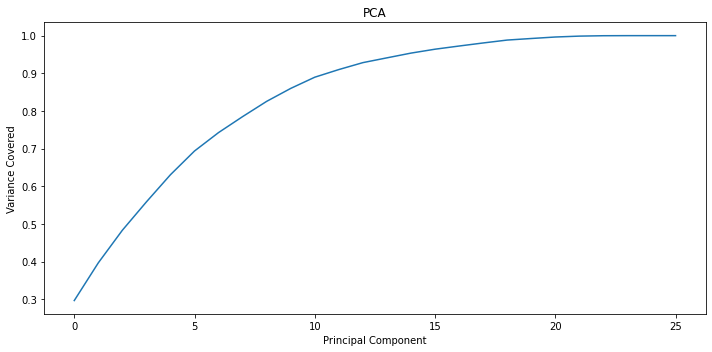

In [24]:
plt.figure(figsize=[10,5])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Component')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.tight_layout()

In [13]:
pca = PCA(n_components=20)
new_df = pca.fit_transform(x_scaled)
pca_df = pd.DataFrame(new_df, columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20'])

**Model Building**

In [14]:
#Importing necessary metrics to build the model

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [15]:
#Splitting the data into train and test

x_train, x_test, y_train, y_test = train_test_split(pca_df, y, test_size = 0.25, random_state = 100, stratify = y)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

In [17]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
xgb = XGBClassifier()

In [18]:
#training with the all of them

lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
svc.fit(x_train,y_train)
xgb.fit(x_train,y_train)

print("All Models Trained")

[16:30:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
All Models Trained


In [19]:
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
svc.score(x_test,y_test)
xgb.score(x_test,y_test)

print("All scores Captured")

All scores Captured


In [20]:
#Accuracy score
print('Logistic Regression =', accuracy_score(y_test,lr.predict(x_test)))
print('Decision Tree =', accuracy_score(y_test,dt.predict(x_test)))
print('Random Forest =', accuracy_score(y_test,rf.predict(x_test)))
print('SVC =', accuracy_score(y_test,svc.predict(x_test)))
print('Xtreme Gradient Boost =', accuracy_score(y_test,xgb.predict(x_test)))

Logistic Regression = 0.8751370447070289
Decision Tree = 0.8496528200755269
Random Forest = 0.9012790839322694
SVC = 0.8862224387866975
Xtreme Gradient Boost = 0.9027165306371057


In [21]:
#Lets check the roc_auc_score of every model

print('Logistic Regression =', roc_auc_score(y_test,lr.predict(x_test)))
print('Decision Tree =', roc_auc_score(y_test,dt.predict(x_test)))
print('Random Forest =', roc_auc_score(y_test,rf.predict(x_test)))
print('SVC =', roc_auc_score(y_test,svc.predict(x_test)))
print('Xtreme Gradient Boost =', roc_auc_score(y_test,xgb.predict(x_test)))

Logistic Regression = 0.6092816315974984
Decision Tree = 0.6945375874354017
Random Forest = 0.7048765470308708
SVC = 0.6364137781527224
Xtreme Gradient Boost = 0.7034753776084179


In [22]:
#Classification Report

print('Classification report of Logistic Regression \n', classification_report(y_test,lr.predict(x_test)))
print('Classification report of Decision Tree \n', classification_report(y_test,dt.predict(x_test)))
print('Classification report of Random Forest \n', classification_report(y_test,rf.predict(x_test)))
print('Classification report of SVC \n', classification_report(y_test,svc.predict(x_test)))
print('Classification report of Xtreme Gradient Boost \n', classification_report(y_test,xgb.predict(x_test)))

Classification report of Logistic Regression 
               precision    recall  f1-score   support

           0       0.62      0.24      0.35      5643
           1       0.89      0.98      0.93     35402

    accuracy                           0.88     41045
   macro avg       0.75      0.61      0.64     41045
weighted avg       0.85      0.88      0.85     41045

Classification report of Decision Tree 
               precision    recall  f1-score   support

           0       0.46      0.48      0.47      5643
           1       0.92      0.91      0.91     35402

    accuracy                           0.85     41045
   macro avg       0.69      0.69      0.69     41045
weighted avg       0.85      0.85      0.85     41045

Classification report of Random Forest 
               precision    recall  f1-score   support

           0       0.74      0.43      0.55      5643
           1       0.92      0.98      0.94     35402

    accuracy                           0.90     41045

In [23]:
print('Confusion Matrix of Logistic Regression\n', confusion_matrix(y_test,lr.predict(x_test)))
print('Confusion Matrix of Decision Tree\n', confusion_matrix(y_test,dt.predict(x_test)))
print('Confusion Matrix of Random Forest \n', confusion_matrix(y_test,rf.predict(x_test)))
print('Confusion Matrix of SVC \n', confusion_matrix(y_test,svc.predict(x_test)))
print('Confusion Matrix of Xtreme Gradient Boost \n', confusion_matrix(y_test,xgb.predict(x_test)))

Confusion Matrix of Logistic Regression
 [[ 1369  4274]
 [  851 34551]]
Confusion Matrix of Decision Tree
 [[ 2712  2931]
 [ 3240 32162]]
Confusion Matrix of Random Forest 
 [[ 2449  3194]
 [  858 34544]]
Confusion Matrix of SVC 
 [[ 1647  3996]
 [  674 34728]]
Confusion Matrix of Xtreme Gradient Boost 
 [[ 2419  3224]
 [  769 34633]]


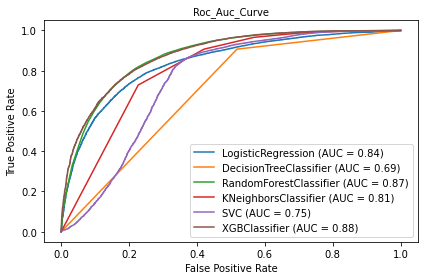

In [44]:
curve = plot_roc_curve(lr,x_test,y_test)

plot_roc_curve(dt,x_test,y_test,ax=curve.ax_)

plot_roc_curve(rf,x_test,y_test,ax=curve.ax_)

plot_roc_curve(svc,x_test,y_test,ax=curve.ax_)

plot_roc_curve(xgb,x_test,y_test,ax=curve.ax_)

plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

Getting all the other scores for RandomForest

In [61]:
xgbc = XGBClassifier(n_estimators=120, random_state =100)

In [62]:
xgbc.fit(x_train,y_train)

[20:04:20] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=120, n_jobs=4, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [63]:
y_pred = xgbc.predict(x_test)

In [64]:
# For Accuracy Score

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9023267145815568

In [65]:
#For Confusion Matrix

conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 2427,  3216],
       [  793, 34609]], dtype=int64)

In [66]:
#AUC SCORE

roc_auc_score(y_test,y_pred)

0.7038452565221793

In [67]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.43      0.55      5643
           1       0.91      0.98      0.95     35402

    accuracy                           0.90     41045
   macro avg       0.83      0.70      0.75     41045
weighted avg       0.89      0.90      0.89     41045



In [68]:
#Doing Cross Validation

from sklearn.model_selection import cross_val_score

cvs = cross_val_score(xgbc,x,y,cv=5)

cvs.mean()

[20:05:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:06:45] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:07:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

0.9095305731268404

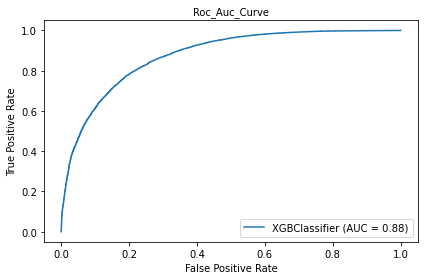

In [71]:
#Plotting ROC_AUC Curve for the model
plot_roc_curve(xgbc,x_test,y_test)
plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

**HyperParameter Tuning**

Xtreme Gradient Boost

In [24]:
from sklearn.model_selection import GridSearchCV

In [101]:
params = {'n_estimators':[100,120],
         'criterion':['gini','entropy'],
        'learning_rate' :[0.25,0.30],
          'booster':['gbtree','dart'],
         'max_depth':[5,6]}

In [102]:
grid = GridSearchCV(xgbc, param_grid= params, cv = 2, n_jobs=-1)

In [103]:
grid.fit(x_train,y_train)

[23:40:48] WARNING: ..\src\learner.cc:541: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:40:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=120, n_jobs=4,
                                     num_parallel_tree=1, random_state=100,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
       

In [104]:
print('Best Estimators == > \n', grid.best_params_)

Best Estimators == > 
 {'booster': 'gbtree', 'criterion': 'gini', 'learning_rate': 0.25, 'max_depth': 6, 'n_estimators': 100}


In [105]:
#Reinstantiating classifier with the best parameters

clf = grid.best_estimator_

In [106]:
clf.fit(x_train, y_train)


[23:41:51] WARNING: ..\src\learner.cc:541: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:41:52] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, criterion='gini', gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=100,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [107]:
y_pred =  clf.predict(x_test)

In [108]:
# For Accuracy Score

accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9019125350225362

In [109]:
#For Confusion Matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 2384,  3259],
       [  767, 34635]], dtype=int64)

In [110]:
#AUC SCORE
roc_auc_score(y_test,y_pred)

0.7004024372883997

In [111]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.76      0.42      0.54      5643
           1       0.91      0.98      0.95     35402

    accuracy                           0.90     41045
   macro avg       0.84      0.70      0.74     41045
weighted avg       0.89      0.90      0.89     41045



In [112]:
#Cross Validating.

cvs = cross_val_score(clf,x,y,cv=5)

cvs.mean()

[23:42:54] WARNING: ..\src\learner.cc:541: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:42:55] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:43:17] WARNING: ..\src\learner.cc:541: 
Parameters: { criterion } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:43:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluat

0.9094087504154957

In [113]:
#Plotting ROC_AUC Curve for the model
plot_roc_curve(clf,x_test,y_test)
plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

Random Forest

In [48]:
params = {'n_estimators':[100,120],
         'criterion':['gini','entropy'],
         'max_depth':[5,6],
         'min_samples_split':[6,7],
         'min_samples_leaf':[4,5],
         }

In [49]:
grid = GridSearchCV(rf, param_grid= params, cv = 2, n_jobs=-1)

In [50]:
grid.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 6],
                         'min_samples_leaf': [4, 5],
                         'min_samples_split': [6, 7],
                         'n_estimators': [100, 120]})

In [51]:
print('Best Estimators == > \n', grid.best_params_)

Best Estimators == > 
 {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 120}


In [52]:
clf = grid.best_estimator_

In [53]:
clf.fit(x_train, y_train)


RandomForestClassifier(max_depth=6, min_samples_leaf=4, min_samples_split=7,
                       n_estimators=120)

In [54]:
y_pred =  clf.predict(x_test)

In [55]:
print('Accuracy Score=',accuracy_score(y_test,y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print('ROC_AUC Score=',roc_auc_score(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))

Accuracy Score= 0.8929954927518577
Confusion Matrix
 [[ 1569  4074]
 [  318 35084]]
ROC_AUC Score= 0.6345305252369676
Classification Report
               precision    recall  f1-score   support

           0       0.83      0.28      0.42      5643
           1       0.90      0.99      0.94     35402

    accuracy                           0.89     41045
   macro avg       0.86      0.63      0.68     41045
weighted avg       0.89      0.89      0.87     41045



In [57]:
#Cross Validating.

from sklearn.model_selection import cross_val_score

cvs_rf = cross_val_score(clf,x,y,cv=5)

cvs_rf.mean()

0.8947781931544269

In [58]:
#Plotting ROC_AUC Curve for the model
plot_roc_curve(clf,x_test,y_test)
plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

Logistic Regression

In [75]:
params = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
         'C':[1.0,2.0],
         'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
          'max_iter':[100,110],
         }

In [74]:
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [76]:
grid3 = GridSearchCV(lr, param_grid= params, cv = 2, n_jobs=-1)

In [77]:
grid3.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1.0, 2.0], 'max_iter': [100, 110],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [78]:
print('Best Estimators == > \n', grid3.best_params_)

Best Estimators == > 
 {'C': 1.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}


In [79]:
clf3= grid3.best_estimator_

In [80]:
clf3.fit(x_train, y_train)

LogisticRegression(penalty='l1', solver='saga')

In [81]:
y_pred =  clf3.predict(x_test)

In [82]:
print('Accuracy Score=',accuracy_score(y_test,y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print('ROC_AUC Score=',roc_auc_score(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))

Accuracy Score= 0.8751370447070289
Confusion Matrix
 [[ 1368  4275]
 [  850 34552]]
ROC_AUC Score= 0.6092071497415829
Classification Report
               precision    recall  f1-score   support

           0       0.62      0.24      0.35      5643
           1       0.89      0.98      0.93     35402

    accuracy                           0.88     41045
   macro avg       0.75      0.61      0.64     41045
weighted avg       0.85      0.88      0.85     41045



In [83]:
#Cross Validating.

from sklearn.model_selection import cross_val_score

cvs_lr = cross_val_score(clf3,x,y,cv=5)

cvs_lr.mean()

0.8740749406452635

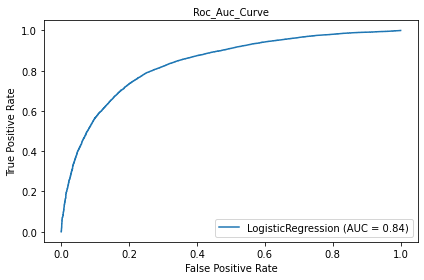

In [84]:
#Plotting ROC_AUC Curve for the model
plot_roc_curve(clf3,x_test,y_test)
plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

Decision Tree

In [91]:
params = {'criterion':['gini','entropy'],
         'max_depth':[5,6],
         'min_samples_split':[6,7],
         'min_samples_leaf':[4,5],
         'max_features':['auto','sqrt','log2']}

In [92]:
grid1 = GridSearchCV(dt, param_grid= params, cv = 2, n_jobs=-1)

In [93]:
grid1.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [4, 5],
                         'min_samples_split': [6, 7]})

In [94]:
print('Best Estimators == > \n', grid1.best_params_)

Best Estimators == > 
 {'criterion': 'gini', 'max_depth': 6, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 6}


In [95]:
clf1= grid1.best_estimator_

In [96]:
clf1.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, max_features='log2', min_samples_leaf=4,
                       min_samples_split=6)

In [97]:
y_pred =  clf1.predict(x_test)

In [98]:
print('Accuracy Score=',accuracy_score(y_test,y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print('ROC_AUC Score=',roc_auc_score(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))

Accuracy Score= 0.893921305883786
Confusion Matrix
 [[ 1876  3767]
 [  587 34815]]
ROC_AUC Score= 0.657933147845255
Classification Report
               precision    recall  f1-score   support

           0       0.76      0.33      0.46      5643
           1       0.90      0.98      0.94     35402

    accuracy                           0.89     41045
   macro avg       0.83      0.66      0.70     41045
weighted avg       0.88      0.89      0.88     41045



In [99]:
#Cross Validating.

from sklearn.model_selection import cross_val_score

cvs_dt = cross_val_score(clf1,x,y,cv=5)

cvs_dt.mean()

0.8841675557193639

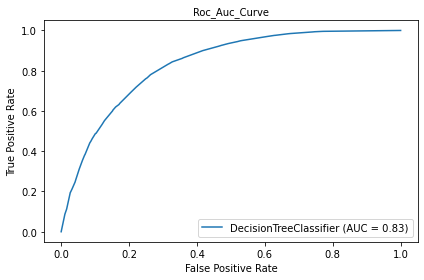

In [100]:
#Plotting ROC_AUC Curve for the model
plot_roc_curve(clf1,x_test,y_test)
plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()

Support Vector Classfier:

In [25]:
params = {'C':[1,2],
         'kernel': ['liner', 'rbf'],
         'max_iter':[-1,2]}

In [ ]:
svc()

In [26]:
grid2 = GridSearchCV(svc, param_grid= params, cv = 2, n_jobs=-1)

In [27]:
grid2.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 2], 'kernel': ['liner', 'rbf'],
                         'max_iter': [-1, 2]})

In [28]:
print('Best Estimators == > \n', grid2.best_params_)

Best Estimators == > 
 {'C': 2, 'kernel': 'rbf', 'max_iter': -1}


In [29]:
clf2= grid2.best_estimator_

In [30]:
clf2.fit(x_train, y_train)

SVC(C=2)

In [31]:
y_pred =  clf2.predict(x_test)

In [32]:
print('Accuracy Score=',accuracy_score(y_test,y_pred))
print('Confusion Matrix\n',confusion_matrix(y_test,y_pred))
print('ROC_AUC Score=',roc_auc_score(y_test,y_pred))
print('Classification Report\n',classification_report(y_test,y_pred))

Accuracy Score= 0.8883177000852722
Confusion Matrix
 [[ 1716  3927]
 [  657 34745]]
ROC_AUC Score= 0.6427676468537972
Classification Report
               precision    recall  f1-score   support

           0       0.72      0.30      0.43      5643
           1       0.90      0.98      0.94     35402

    accuracy                           0.89     41045
   macro avg       0.81      0.64      0.68     41045
weighted avg       0.87      0.89      0.87     41045



In [34]:
# Checking Cross Validation Score
from sklearn.model_selection import cross_val_score

cvs_svc = cross_val_score(clf2,x,y,cv=3)

cvs_svc.mean()

0.88819384019799

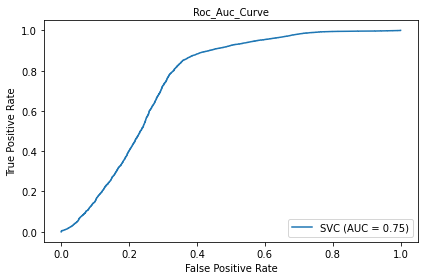

In [35]:
#Plotting ROC_AUC Curve for the model
plot_roc_curve(clf2,x_test,y_test)
plt.title('Roc_Auc_Curve', fontsize = 10)
plt.tight_layout()